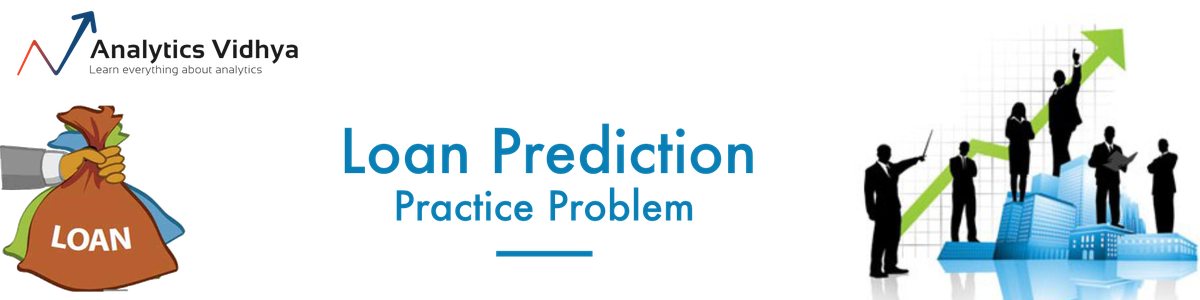

# Predict Loan Eligibility for Dream Housing Finance company

## Problem Statement
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Data Description operty_Area	|Urban/ Semi Urban/ Rural|

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

| Variable | Description |
|:--:|:--|
| Loan_ID|	Unique Loan ID|
|Gender	|Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education|	Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands
|Loan_Amount_Term	|Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area	|Urban/ Semi Urban/ Rural|
|Loan_Status	|(Target) Loan approved (Y/N)|

Test file: CSV containing the customer information for whom loan eligibility is to be predicted

|Variable	|Description|
|------------|:-----------|
| Loan_ID|	Unique Loan ID|
|Gender	|Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education|	Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands
|Loan_Amount_Term	|Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area	|Urban/ Semi Urban/ Rural|

In [1]:
#importing required libraries
import os
import io
import pandas as pd # import I/O files
import numpy as np # linear algebra
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat\Loan Predictions"

D:\Imarticus\stat\Loan Predictions


In [3]:
loan_tr=pd.read_csv('train_ctrUa4K.csv') # importing train file

In [4]:
loan_tt=pd.read_csv('test_lAUu6dG.csv') # importing test file

In [5]:
loan_tr.shape
# checking shape of train data

(614, 13)

In [6]:
loan_tr.head()
# head() is used to display the first few rows of a DataFrame or a Series. It helps you get a quick overview of the data.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_tr.tail()
# tail() method is similar to head(), but it displays the last few rows of a DataFrame or a Series.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# The dtypes attribute of a DataFrame provides information about the data types of each column.l
loan_tr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
# The info() method provides a concise summary of a DataFrame, including information about the data types, 
# non-null values, and memory usage.
loan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# The describe() method provides a summary of the central tendency, dispersion, and shape of the distribution of the data.
loan_tr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# The shape method provides a dimension of the DataFrame
loan_tr.shape

(614, 13)

In [12]:
loan_tt.shape

(367, 12)

In [13]:
loan_tt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
loan_tt.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [15]:
loan_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [16]:
loan_tr.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
loan_tr.Dependents.value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [18]:
loan_tr.Dependents=loan_tr.Dependents.fillna(0)

In [19]:
loan_tr.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [20]:
loan_tr.Gender=loan_tr.Gender.fillna('Male')

In [21]:
loan_tr.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [22]:
loan_tr.Self_Employed=loan_tr.Self_Employed.fillna('No')

In [23]:
loan_tr.LoanAmount.mean()

146.41216216216216

In [24]:
loan_tr.LoanAmount.value_counts(dropna=False)

NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64

In [25]:
loan_tr.LoanAmount=loan_tr.LoanAmount.fillna(loan_tr.LoanAmount.mean())

In [26]:
loan_tr.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
loan_tr.Loan_Amount_Term=loan_tr.Loan_Amount_Term.fillna(360.0)

In [28]:
loan_tr.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
loan_tr.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [30]:
loan_tr.Married=loan_tr.Married.fillna('Yes')

In [31]:
loan_tr.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [32]:
loan_tr.Credit_History=loan_tr.Credit_History.fillna(1.0)

In [33]:
loan_tr.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [34]:
loan_tr['Totalamount']=loan_tr['ApplicantIncome']+loan_tr['CoapplicantIncome']

In [35]:
loan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Totalamount        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [36]:
loan_tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Totalamount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [37]:
loan_tr.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [38]:
loan_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [39]:
loan_tt.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [40]:
loan_tt.Gender.value_counts(dropna=False)

Male      286
Female     70
NaN        11
Name: Gender, dtype: int64

In [41]:
loan_tt.Gender=loan_tt.Gender.fillna('Male')

In [42]:
loan_tt.Gender.value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [43]:
loan_tt.Dependents.value_counts(dropna=False)

0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64

In [44]:
loan_tt.Dependents=loan_tt.Dependents.fillna('0')

In [45]:
loan_tt.Dependents.value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [46]:
loan_tt.Self_Employed.value_counts(dropna=False)

No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64

In [47]:
loan_tt.Self_Employed=loan_tt.Self_Employed.fillna('No')

In [48]:
loan_tt.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [49]:
loan_tt.Credit_History.value_counts(dropna=False)

1.0    279
0.0     59
NaN     29
Name: Credit_History, dtype: int64

In [50]:
loan_tt.Credit_History=loan_tt.Credit_History.fillna(1.0)

In [51]:
loan_tt.Credit_History.value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

In [52]:
loan_tt.LoanAmount=loan_tt.LoanAmount.fillna(loan_tt.LoanAmount.mean())

In [53]:
loan_tt.Loan_Amount_Term=loan_tt.Loan_Amount_Term.fillna(loan_tt.Loan_Amount_Term.mean())

In [54]:
loan_tt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
loan_tt['Totalamount']=loan_tt.ApplicantIncome+loan_tt.CoapplicantIncome

In [56]:
loan_tt.Totalamount

0      5720
1      4576
2      6800
3      4886
4      3276
       ... 
362    5786
363    4867
364    5243
365    7393
366    9200
Name: Totalamount, Length: 367, dtype: int64

In [57]:
loan_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Totalamount        367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


In [58]:
loan_tr=loan_tr.drop('Loan_ID',axis=1)
loan_tt=loan_tt.drop('Loan_ID',axis=1)

In [59]:
loan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Totalamount        614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [60]:
loan_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
 11  Totalamount        367 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


## Splitting into numcols and object cols

In [61]:
numcols=loan_tr.select_dtypes(include=np.number)
objcols=loan_tr.select_dtypes(include='object')

In [62]:
numcols.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Totalamount
0,5849,0.0,146.412162,360.0,1.0,5849.0
1,4583,1508.0,128.000000,360.0,1.0,6091.0
2,3000,0.0,66.000000,360.0,1.0,3000.0
3,2583,2358.0,120.000000,360.0,1.0,4941.0
4,6000,0.0,141.000000,360.0,1.0,6000.0


In [63]:
numcols.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Totalamount
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431,0.620102
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.070917
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000,-0.012563
Totalamount,0.893037,0.342781,0.620102,-0.070917,-0.012563,1.000000


<Axes: >

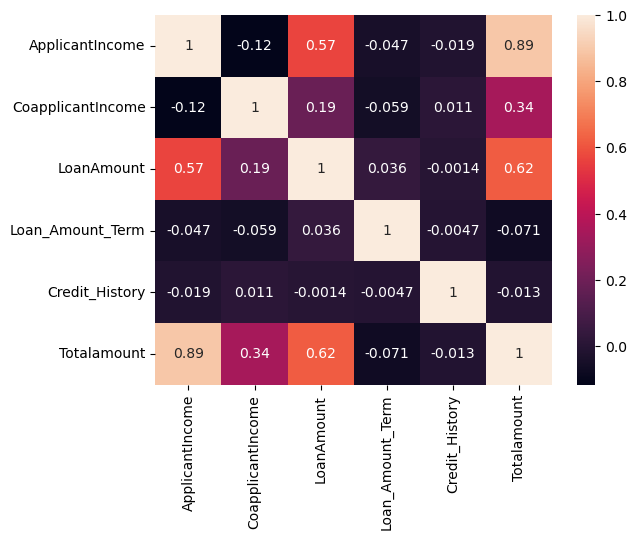

In [64]:
sns.heatmap(numcols.corr(),annot=True)

In [65]:
objcols.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [66]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         614 non-null    object
 1   Married        614 non-null    object
 2   Dependents     614 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  614 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


In [67]:
objcols = objcols.astype(str)

In [68]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         614 non-null    object
 1   Married        614 non-null    object
 2   Dependents     614 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  614 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
objcols_le=objcols.apply(LabelEncoder().fit_transform)

In [71]:
objcols_le.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [72]:
loantr=pd.concat([numcols,objcols_le],axis=1)

In [73]:
loan_tt[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]=loan_tt[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']].apply(LabelEncoder().fit_transform)

In [74]:
loan_tt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Totalamount
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,5720
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4576
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,6800
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4886
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,3276


## Splitting into dependent and independent variables

In [75]:
X=loantr.drop('Loan_Status',axis=1)
y=loantr.Loan_Status

In [76]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Totalamount,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849,0.0,146.412162,360.0,1.0,5849.0,1,0,0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,6091.0,1,1,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,3000.0,1,1,0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,4941.0,1,1,0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,6000.0,1,0,0,0,0,2


In [77]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Totalamount', 'Gender',
       'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [78]:
loan_tt=loan_tt[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Totalamount', 'Gender',
       'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]

In [79]:
loan_tt.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Totalamount,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720,0,110.0,360.0,1.0,5720,1,1,0,0,0,2
1,3076,1500,126.0,360.0,1.0,4576,1,1,1,0,0,2
2,5000,1800,208.0,360.0,1.0,6800,1,1,2,0,0,2
3,2340,2546,100.0,360.0,1.0,4886,1,1,2,0,0,2
4,3276,0,78.0,360.0,1.0,3276,1,0,0,1,0,2


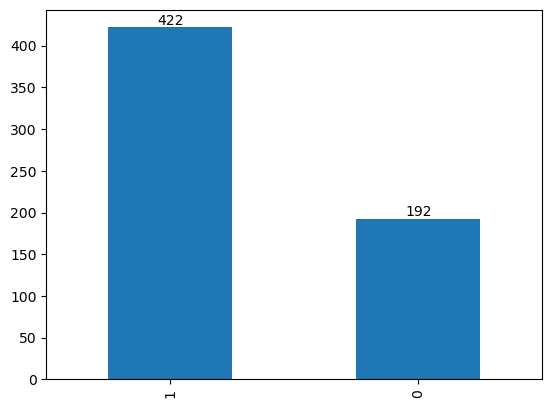

In [80]:
ax=y.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: >

<Figure size 3000x1500 with 0 Axes>

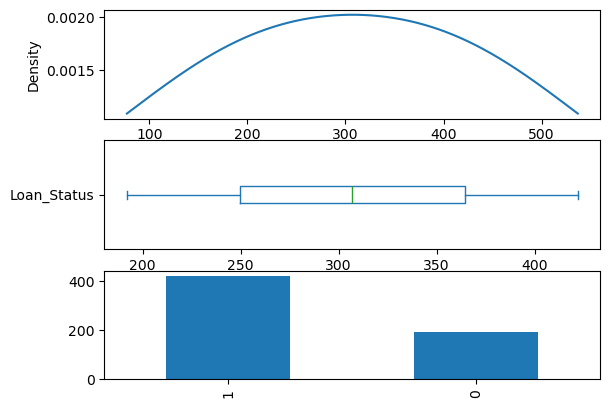

In [81]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
y.value_counts().plot(kind='kde',ax=ax[0])
y.value_counts().plot(kind='box',ax=ax[1],vert=False)
y.value_counts().plot(kind='bar',ax=ax[2])

# Building Model
### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
reg=LogisticRegression()

In [84]:
remodel=reg.fit(X,y)

In [85]:
remodel.score(X,y)

0.6872964169381107

In [86]:
regmodel_X=remodel.predict(X)

In [87]:
pd.crosstab(y,regmodel_X)

col_0,0,1
Loan_Status,,
0,2,190
1,2,420


In [88]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [89]:
cross_val_score(reg,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

array([0.78861789, 0.77235772, 0.80487805, 0.85365854, 0.81147541])

In [90]:
np.mean([0.81300813, 0.77235772, 0.80487805, 0.85365854, 0.81147541])

0.8110755700000001

In [91]:
print(classification_report(y,regmodel_X))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       192
           1       0.69      1.00      0.81       422

    accuracy                           0.69       614
   macro avg       0.59      0.50      0.42       614
weighted avg       0.63      0.69      0.57       614



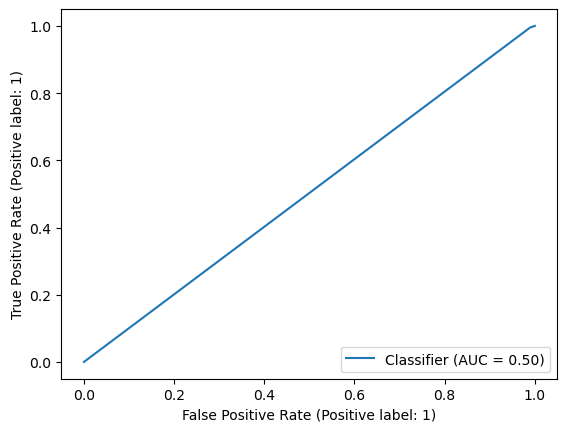

In [92]:
RocCurveDisplay.from_predictions(y,regmodel_X)

In [93]:
regpredict_test=remodel.predict(loan_tt)
regpredict_tt = map(lambda x: 'Y' if x == 1 else 'N', regpredict_test)

In [88]:
pd.DataFrame(regpredict_tt).to_csv('reg.csv')

# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
tree=DecisionTreeClassifier(max_depth=8)

In [96]:
treemodel=tree.fit(X,y)

In [97]:
treemodel.score(X,y)

0.8745928338762216

In [98]:
tree_X=treemodel.predict(X)

In [99]:
pd.crosstab(y,tree_X)

col_0,0,1
Loan_Status,,
0,122,70
1,7,415


In [100]:
cross_val_score(tree,X,y)

array([0.74796748, 0.74796748, 0.7804878 , 0.81300813, 0.78688525])

In [101]:
np.mean([0.73170732, 0.74796748, 0.77235772, 0.80487805, 0.78688525])

0.7687591640000001

In [102]:
print(classification_report(y,tree_X))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76       192
           1       0.86      0.98      0.92       422

    accuracy                           0.87       614
   macro avg       0.90      0.81      0.84       614
weighted avg       0.88      0.87      0.87       614



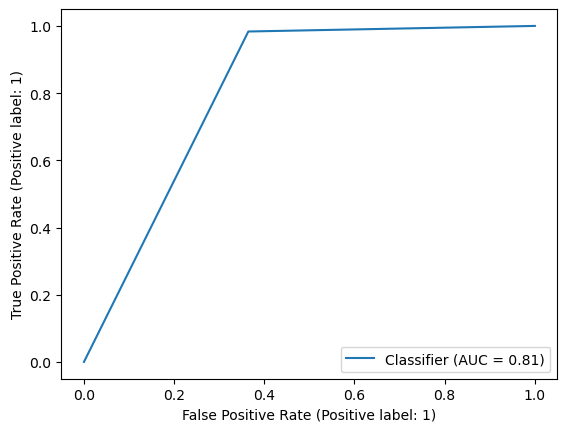

In [103]:
RocCurveDisplay.from_predictions(y,tree_X)

In [104]:
treepredict_test=tree.predict(loan_tt)
treepredict_tt = map(lambda x: 'Y' if x == 1 else 'N', treepredict_test)

In [100]:
pd.DataFrame(treepredict_tt).to_csv('tree.csv')

# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf=RandomForestClassifier(max_depth=8,n_estimators=3000)

In [107]:
rfmodel=rf.fit(X,y)

In [108]:
rfmodel.score(X,y)

0.8762214983713354

In [109]:
cross_val_score(rf,X,y)

array([0.78861789, 0.75609756, 0.7804878 , 0.83739837, 0.81967213])

In [110]:
np.mean([0.78861789, 0.75609756, 0.7804878 , 0.83739837, 0.81967213])

0.79645475

In [111]:
rfpredict_X=rfmodel.predict(X)

In [112]:
pd.crosstab(y,rfpredict_X)

col_0,0,1
Loan_Status,,
0,116,76
1,0,422


In [113]:
print(classification_report(y,rfpredict_X))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       192
           1       0.85      1.00      0.92       422

    accuracy                           0.88       614
   macro avg       0.92      0.80      0.84       614
weighted avg       0.90      0.88      0.87       614



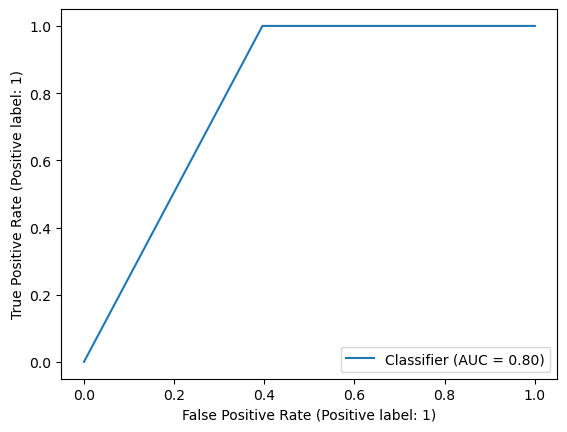

In [114]:
RocCurveDisplay.from_predictions(y,rfpredict_X)

In [115]:
rfpredict_test=rfmodel.predict(loan_tt)
rfpredict_tt = map(lambda x: 'Y' if x == 1 else 'N', rfpredict_test)

In [112]:
pd.DataFrame(rfpredict_tt).to_csv('rf.csv')

# GBM

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gbc=GradientBoostingClassifier(max_depth=2,n_estimators=150)

In [118]:
gbcmodel=gbc.fit(X,y)

In [119]:
gbc.score(X,y)

0.8599348534201955

In [120]:
cross_val_score(gbc,X,y)

array([0.7398374 , 0.74796748, 0.7804878 , 0.84552846, 0.81967213])

In [121]:
np.mean([0.7398374 , 0.74796748, 0.7804878 , 0.84552846, 0.81967213])

0.786698654

In [122]:
gbc_X=gbc.predict(X)

In [123]:
pd.crosstab(y,gbc_X)

col_0,0,1
Loan_Status,,
0,112,80
1,6,416


In [124]:
print(classification_report(y,gbc_X))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72       192
           1       0.84      0.99      0.91       422

    accuracy                           0.86       614
   macro avg       0.89      0.78      0.81       614
weighted avg       0.87      0.86      0.85       614



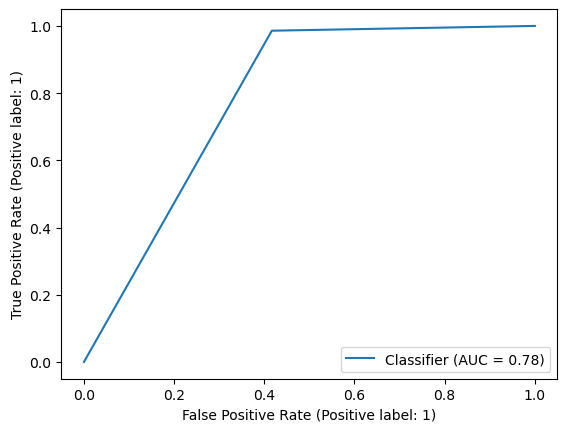

In [125]:
RocCurveDisplay.from_predictions(y,gbc_X)

In [126]:
gbc_predict_test=gbc.predict(loan_tt)
gbcpredict_tt = map(lambda x: 'Y' if x == 1 else 'N', gbc_predict_test)

In [124]:
pd.DataFrame(gbcpredict_tt).to_csv('gbc.csv')

# SVC

In [127]:
from sklearn.svm import SVC

In [128]:
svc=SVC(C=5)

In [129]:
svcmodel=svc.fit(X,y)

In [130]:
svcmodel.score(X,y)

0.6954397394136808

In [131]:
cross_val_score(svc,X,y)

array([0.69105691, 0.68292683, 0.68292683, 0.66666667, 0.68032787])

In [132]:
np.mean([0.69105691, 0.68292683, 0.68292683, 0.66666667, 0.68032787])

0.680781022

In [133]:
svc_X=svc.predict(X)

In [134]:
pd.crosstab(y,svc_X)

col_0,0,1
Loan_Status,,
0,6,186
1,1,421


In [135]:
print(classification_report(y,svc_X))

              precision    recall  f1-score   support

           0       0.86      0.03      0.06       192
           1       0.69      1.00      0.82       422

    accuracy                           0.70       614
   macro avg       0.78      0.51      0.44       614
weighted avg       0.74      0.70      0.58       614



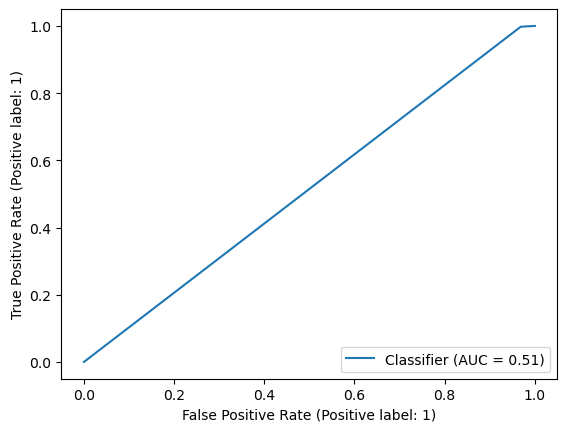

In [136]:
RocCurveDisplay.from_predictions(y,svc_X)

In [137]:
svc_predict_test=svc.predict(loan_tt)
svcpredict_tt = map(lambda x: 'Y' if x == 1 else 'N', svc_predict_test)

In [136]:
pd.DataFrame(svcpredict_tt).to_csv('svc.csv')

# LinearSVC

In [138]:
from sklearn.svm import LinearSVC

In [149]:
lsvc=LinearSVC(C=7)

In [150]:
lsvc_model=lsvc.fit(X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [151]:
lsvc_model.score(X,y)

0.6970684039087948

In [152]:
cross_val_score(lsvc,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` i

array([0.69105691, 0.30894309, 0.63414634, 0.68292683, 0.68852459])

In [153]:
np.mean([0.69105691, 0.30894309, 0.63414634, 0.68292683, 0.68852459])

0.601119552

In [154]:
lsvc_X=lsvc.predict(X)

In [155]:
pd.crosstab(y,lsvc_X)

col_0,0,1
Loan_Status,,
0,9,183
1,3,419


In [156]:
print(classification_report(y,lsvc_X))

              precision    recall  f1-score   support

           0       0.75      0.05      0.09       192
           1       0.70      0.99      0.82       422

    accuracy                           0.70       614
   macro avg       0.72      0.52      0.45       614
weighted avg       0.71      0.70      0.59       614



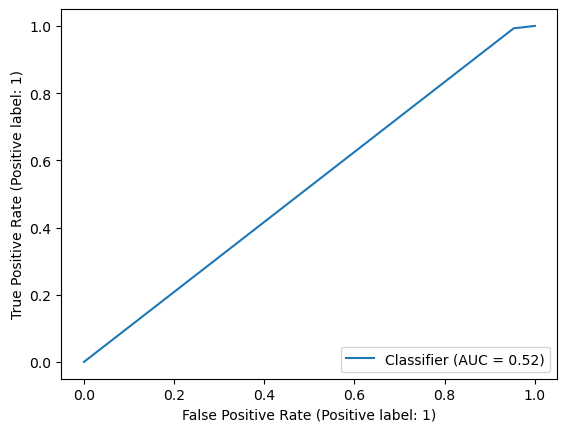

In [158]:
RocCurveDisplay.from_predictions(y,lsvc_X)

In [159]:
lsvc_predict_test=lsvc.predict(loan_tt)
lsvcpredict_tt = map(lambda x: 'Y' if x == 1 else 'N', lsvc_predict_test)

In [ ]:
pd.DataFrame(lsvcpredict_tt).to_csv('lsvc.csv')

# KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knc=KNeighborsClassifier()

In [162]:
kncmodel=knc.fit(X,y)

In [163]:
kncmodel.score(X,y)

0.7361563517915309

In [164]:
cross_val_score(knc,X,y)

array([0.63414634, 0.59349593, 0.61788618, 0.57723577, 0.67213115])

In [165]:
np.mean([0.63414634, 0.59349593, 0.61788618, 0.57723577, 0.67213115])

0.618979074

In [166]:
knc_X=knc.predict(X)

In [167]:
pd.crosstab(y,knc_X)

col_0,0,1
Loan_Status,,
0,64,128
1,34,388


In [168]:
print(classification_report(y,knc_X))

              precision    recall  f1-score   support

           0       0.65      0.33      0.44       192
           1       0.75      0.92      0.83       422

    accuracy                           0.74       614
   macro avg       0.70      0.63      0.63       614
weighted avg       0.72      0.74      0.71       614



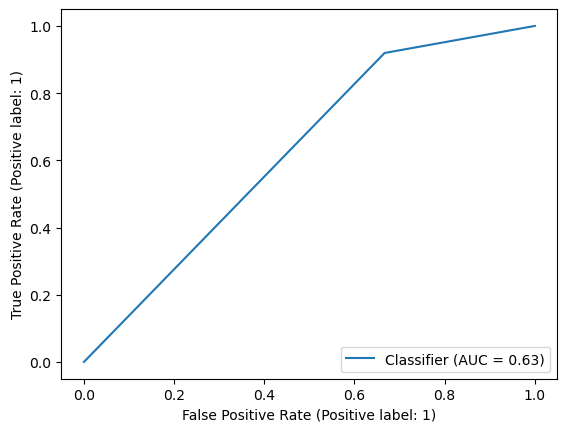

In [169]:
RocCurveDisplay.from_predictions(y,knc_X)

In [170]:
knc_predict_test=knc.predict(loan_tt)
kncpredict_tt = map(lambda x: 'Y' if x == 1 else 'N', knc_predict_test)

In [148]:
pd.DataFrame(kncpredict_tt).to_csv('knc.csv')

# Naive bayes

In [171]:
from sklearn.naive_bayes import GaussianNB

In [172]:
gb=GaussianNB()

In [173]:
gbmodel=gb.fit(X,y)

In [174]:
gbmodel.score(X,y)

0.7980456026058632

In [175]:
cross_val_score(gb,X,y)

array([0.80487805, 0.75609756, 0.77235772, 0.82926829, 0.77868852])

In [176]:
np.mean([0.80487805, 0.75609756, 0.77235772, 0.82926829, 0.77868852])

0.7882580279999999

In [177]:
gb_X=gb.predict(X)

In [178]:
pd.crosstab(y,gb_X)

col_0,0,1
Loan_Status,,
0,89,103
1,21,401


In [179]:
print(classification_report(y,gb_X))

              precision    recall  f1-score   support

           0       0.81      0.46      0.59       192
           1       0.80      0.95      0.87       422

    accuracy                           0.80       614
   macro avg       0.80      0.71      0.73       614
weighted avg       0.80      0.80      0.78       614



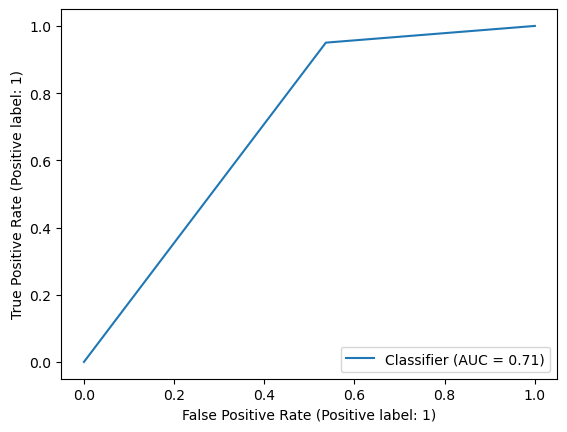

In [180]:
RocCurveDisplay.from_predictions(y,gb_X)

In [181]:
gb_predict_test=gb.predict(loan_tt)
gb_predict_tt = map(lambda x: 'Y' if x == 1 else 'N', gb_predict_test)

In [160]:
pd.DataFrame(gb_predict_tt).to_csv('gbnb.csv')

# MultinomialNB

In [182]:
from sklearn.naive_bayes import MultinomialNB

In [183]:
mb=MultinomialNB()

In [184]:
mbmodel=mb.fit(X,y)

In [185]:
mbmodel.score(X,y)

0.49022801302931596

In [186]:
cross_val_score(mb,X,y)

array([0.45528455, 0.5203252 , 0.44715447, 0.5203252 , 0.49180328])

In [187]:
np.mean([0.45528455, 0.5203252 , 0.44715447, 0.5203252 , 0.49180328])

0.48697854000000007

In [188]:
mb_X=mb.predict(X)

In [189]:
pd.crosstab(y,mb_X)

col_0,0,1
Loan_Status,,
0,86,106
1,207,215


In [190]:
print(classification_report(y,mb_X))

              precision    recall  f1-score   support

           0       0.29      0.45      0.35       192
           1       0.67      0.51      0.58       422

    accuracy                           0.49       614
   macro avg       0.48      0.48      0.47       614
weighted avg       0.55      0.49      0.51       614



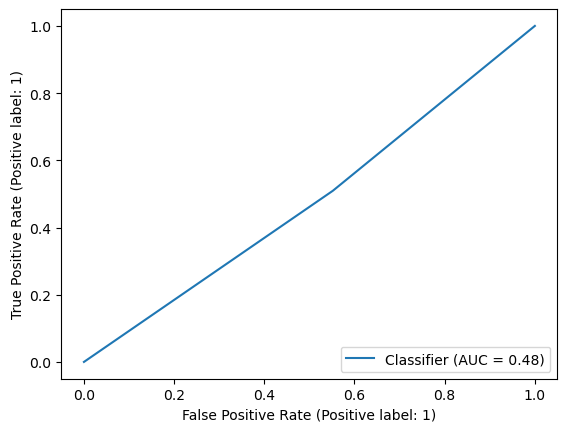

In [191]:
RocCurveDisplay.from_predictions(y,mb_X)

In [192]:
mb_predict_test=mb.predict(loan_tt)
mb_predict_tt = map(lambda x: 'Y' if x == 1 else 'N', mb_predict_test)

In [172]:
pd.DataFrame(mb_predict_tt).to_csv('mbnb.csv')

# BernouliNB

In [193]:
from sklearn.naive_bayes import BernoulliNB

In [194]:
bnb=BernoulliNB()

In [195]:
bnbmodel=bnb.fit(X,y)

In [196]:
bnbmodel.score(X,y)

0.8094462540716613

In [197]:
cross_val_score(bnb,X,y)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [198]:
np.mean([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

0.8094628800000001

In [199]:
bnb_X=bnb.predict(X)

In [200]:
pd.crosstab(y,bnb_X)

col_0,0,1
Loan_Status,,
0,82,110
1,7,415


In [201]:
print(classification_report(y,bnb_X))

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



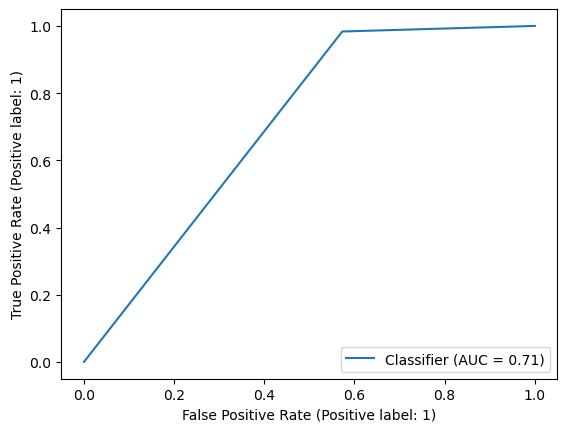

In [202]:
RocCurveDisplay.from_predictions(y,bnb_X)

In [203]:
bnb_predict_test=bnb.predict(loan_tt)
bnb_predict_tt = map(lambda x: 'Y' if x == 1 else 'N', bnb_predict_test)

In [184]:
pd.DataFrame(bnb_predict_tt).to_csv('bnb.csv')

# CategoricalNB

In [204]:
from sklearn.naive_bayes import CategoricalNB

In [205]:
cnb=CategoricalNB()

In [206]:
cnb_model=cnb.fit(X,y)

In [207]:
cnb_model.score(X,y)

0.8973941368078175

In [208]:
cross_val_score(cnb,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 102

array([0.78861789,        nan, 0.78861789,        nan,        nan])

In [211]:
np.mean([0.78861789,0.7861789])

0.7873983950000001

In [212]:
cnb_X=cnb.predict(X)

In [213]:
pd.crosstab(y,cnb_X)

col_0,0,1
Loan_Status,,
0,130,62
1,1,421


In [214]:
print(classification_report(y,cnb_X))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80       192
           1       0.87      1.00      0.93       422

    accuracy                           0.90       614
   macro avg       0.93      0.84      0.87       614
weighted avg       0.91      0.90      0.89       614



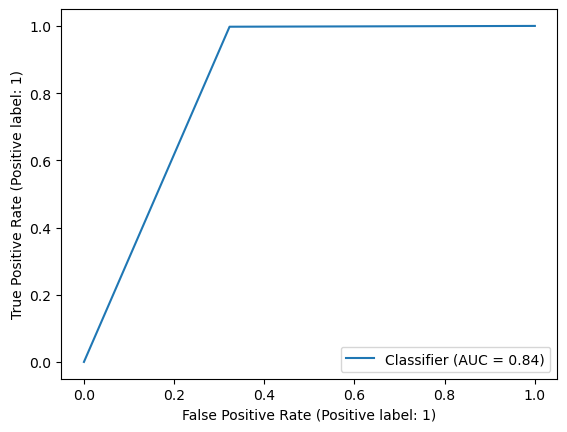

In [215]:
RocCurveDisplay.from_predictions(y,cnb_X)

In [216]:
cnb_predict_test=svc.predict(loan_tt)
cnbpredict_tt = map(lambda x: 'Y' if x == 1 else 'N', cnb_predict_test)

In [ ]:
pd.DataFrame(cnbpredict_tt).to_csv('cnb.csv')

# Converting Imbalance data to Balance Data

In [217]:
# When we check the bar plot for the dependent variable it shows the data is imbalanced and oversampling so we need to use 
# over_sampling(SMOTE) to balance the data.
from imblearn.over_sampling import SMOTE

In [218]:
sm=SMOTE(random_state=42)

In [219]:
X_smote,y_smote=sm.fit_resample(X,y)

In [220]:
pd.DataFrame(y_smote).value_counts()

Loan_Status
0              422
1              422
dtype: int64

# Logistic Regression using smote

In [221]:
reg_smote=LogisticRegression(max_iter=1000)

In [222]:
regmodel_smote=reg_smote.fit(X_smote,y_smote)

In [223]:
regmodel_smote.score(X_smote,y_smote)

0.7796208530805687

In [224]:
regmodel_X_sm=remodel.predict(X_smote)

In [225]:
pd.crosstab(y_smote,regmodel_X_sm)

col_0,0,1
Loan_Status,,
0,2,420
1,2,420


In [226]:
cross_val_score(reg_smote,X_smote,y_smote)

array([0.69230769, 0.71005917, 0.80473373, 0.80473373, 0.83333333])

In [227]:
np.mean([0.69230769, 0.71005917, 0.80473373, 0.80473373, 0.83928571])

0.7702240060000001

In [228]:
print(classification_report(y_smote,regmodel_X_sm))

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       422
           1       0.50      1.00      0.67       422

    accuracy                           0.50       844
   macro avg       0.50      0.50      0.34       844
weighted avg       0.50      0.50      0.34       844



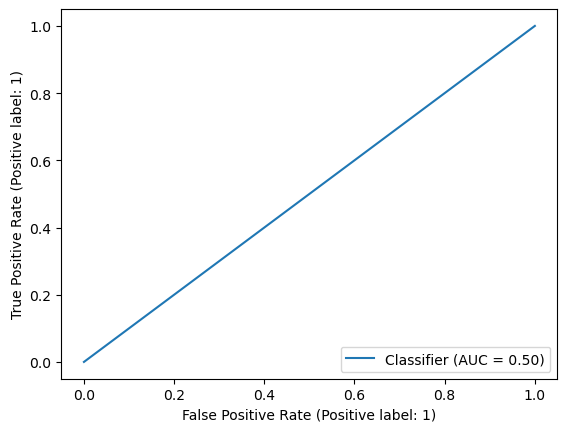

In [229]:
RocCurveDisplay.from_predictions(y_smote,regmodel_X_sm)

In [230]:
regpredict_test_sm=regmodel_smote.predict(loan_tt)
regpredict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', regpredict_test_sm)

In [ ]:
pd.DataFrame(regpredict_tt_sm).to_csv('reg_sm.csv')

# Decission Tree with smote

In [231]:
tree_smote=DecisionTreeClassifier(max_depth=8)

In [232]:
treemodel_sm=tree_smote.fit(X_smote,y_smote)

In [233]:
treemodel_sm.score(X_smote,y_smote)

0.9087677725118484

In [234]:
tree_X_sm=treemodel_sm.predict(X_smote)

In [235]:
pd.crosstab(y_smote,tree_X_sm)

col_0,0,1
Loan_Status,,
0,365,57
1,20,402


In [236]:
cross_val_score(tree_smote,X_smote,y_smote)

array([0.75147929, 0.70414201, 0.80473373, 0.79881657, 0.78571429])

In [237]:
np.mean([0.73372781, 0.73372781, 0.78698225, 0.77514793, 0.7797619 ])

0.76186954

In [238]:
print(classification_report(y_smote,tree_X_sm))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       422
           1       0.88      0.95      0.91       422

    accuracy                           0.91       844
   macro avg       0.91      0.91      0.91       844
weighted avg       0.91      0.91      0.91       844



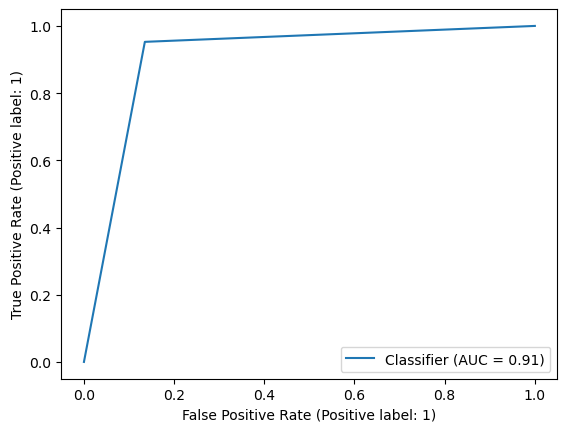

In [239]:
RocCurveDisplay.from_predictions(y_smote,tree_X_sm)

In [240]:
treepredict_test_sm=tree_smote.predict(loan_tt)
treepredict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', treepredict_test_sm)

In [ ]:
pd.DataFrame(treepredict_tt_sm).to_csv('tree_sm.csv')

# Random Forest with smote

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
rf_smote=RandomForestClassifier(max_depth=6,n_estimators=100)

In [243]:
rfmodel_smote=rf_smote.fit(X_smote,y_smote)

In [244]:
rfmodel_smote.score(X_smote,y_smote)

0.8696682464454977

In [245]:
cross_val_score(rf_smote,X_smote,y_smote)

array([0.69822485, 0.76923077, 0.85207101, 0.82840237, 0.86904762])

In [246]:
np.mean([0.70414201, 0.75739645, 0.85207101, 0.84615385, 0.89880952])

0.811714568

In [247]:
rfpredict_X_smote=rfmodel_smote.predict(X_smote)

In [248]:
pd.crosstab(y_smote,rfpredict_X_smote)

col_0,0,1
Loan_Status,,
0,323,99
1,11,411


In [249]:
print(classification_report(y_smote,rfpredict_X_smote))

              precision    recall  f1-score   support

           0       0.97      0.77      0.85       422
           1       0.81      0.97      0.88       422

    accuracy                           0.87       844
   macro avg       0.89      0.87      0.87       844
weighted avg       0.89      0.87      0.87       844



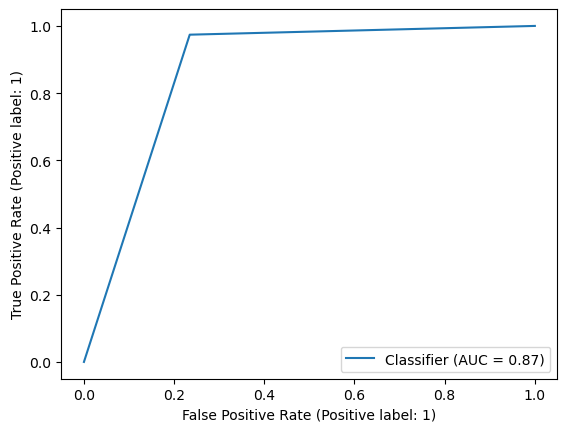

In [250]:
RocCurveDisplay.from_predictions(y_smote,rfpredict_X_smote)

In [251]:
rfpredict_test_smote=rfmodel.predict(loan_tt)
rfpredict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', rfpredict_test_smote)

In [ ]:
pd.DataFrame(rfpredict_tt_sm).to_csv('rf_sm.csv')

# GBM with smote

In [252]:
from sklearn.ensemble import GradientBoostingClassifier

In [253]:
gbc_smote=GradientBoostingClassifier(max_depth=4,n_estimators=20)

In [254]:
gbcmodel_smote=gbc_smote.fit(X_smote,y_smote)

In [255]:
gbc_smote.score(X_smote,y_smote)

0.8530805687203792

In [256]:
cross_val_score(gbc_smote,X_smote,y_smote)

array([0.71005917, 0.74556213, 0.85207101, 0.79881657, 0.86904762])

In [257]:
np.mean([0.70414201, 0.74556213, 0.85207101, 0.79881657, 0.86904762])

0.793927868

In [258]:
gbc_X_smote=gbc_smote.predict(X_smote)

In [259]:
pd.crosstab(y_smote,gbc_X_smote)

col_0,0,1
Loan_Status,,
0,319,103
1,21,401


In [260]:
print(classification_report(y_smote,gbc_X_smote))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       422
           1       0.80      0.95      0.87       422

    accuracy                           0.85       844
   macro avg       0.87      0.85      0.85       844
weighted avg       0.87      0.85      0.85       844



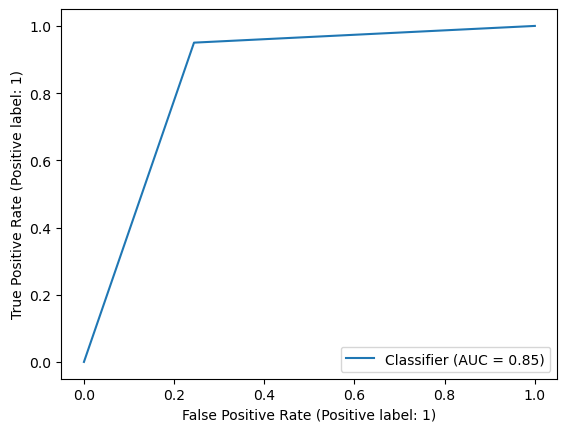

In [261]:
RocCurveDisplay.from_predictions(y_smote,gbc_X_smote)

In [262]:
gbc_predict_test_sm=gbc_smote.predict(loan_tt)
gbcpredict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', gbc_predict_test_sm)

In [ ]:
pd.DataFrame(gbcpredict_tt_sm).to_csv('gbc_sm.csv')

# SVC with smote

In [263]:
from sklearn.svm import SVC

In [264]:
svc_sm=SVC(C=9000000)

In [265]:
svcmodel_smote=svc_sm.fit(X_smote,y_smote)

In [266]:
svcmodel_smote.score(X_smote,y_smote)

0.8495260663507109

In [267]:
cross_val_score(svc_sm,X_smote,y_smote)

array([0.71005917, 0.72189349, 0.78698225, 0.78698225, 0.7797619 ])

In [268]:
np.mean([0.69230769, 0.74556213, 0.76923077, 0.74556213, 0.75      ])

0.740532544

In [269]:
svc_X_smote=svc_sm.predict(X_smote)

In [270]:
pd.crosstab(y_smote,svc_X_smote)

col_0,0,1
Loan_Status,,
0,340,82
1,45,377


In [271]:
print(classification_report(y_smote,svc_X_smote))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       422
           1       0.82      0.89      0.86       422

    accuracy                           0.85       844
   macro avg       0.85      0.85      0.85       844
weighted avg       0.85      0.85      0.85       844



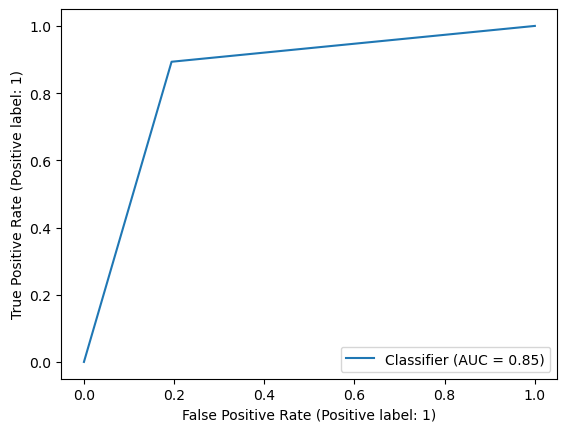

In [272]:
RocCurveDisplay.from_predictions(y_smote,svc_X_smote)

In [273]:
svc_predict_test_sm=svc_sm.predict(loan_tt)
svcpredict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', svc_predict_test_sm)

In [ ]:
pd.DataFrame(svcpredict_tt_sm).to_csv('svc_sm.csv')

# KNN with smote

In [274]:
from sklearn.neighbors import KNeighborsClassifier

In [275]:
knc_sm=KNeighborsClassifier()

In [276]:
kncmodel_sm=knc_sm.fit(X_smote,y_smote)

In [277]:
kncmodel_sm.score(X_smote,y_smote)

0.7713270142180095

In [278]:
cross_val_score(knc_sm,X_smote,y_smote)

array([0.56213018, 0.61538462, 0.66272189, 0.65088757, 0.61904762])

In [279]:
np.mean([0.63414634, 0.59349593, 0.61788618, 0.57723577, 0.67213115])

0.618979074

In [280]:
knc_X_sm=knc_sm.predict(X_smote)

In [281]:
pd.crosstab(y_smote,knc_X_sm)

col_0,0,1
Loan_Status,,
0,348,74
1,119,303


In [282]:
print(classification_report(y_smote,knc_X_sm))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       422
           1       0.80      0.72      0.76       422

    accuracy                           0.77       844
   macro avg       0.77      0.77      0.77       844
weighted avg       0.77      0.77      0.77       844



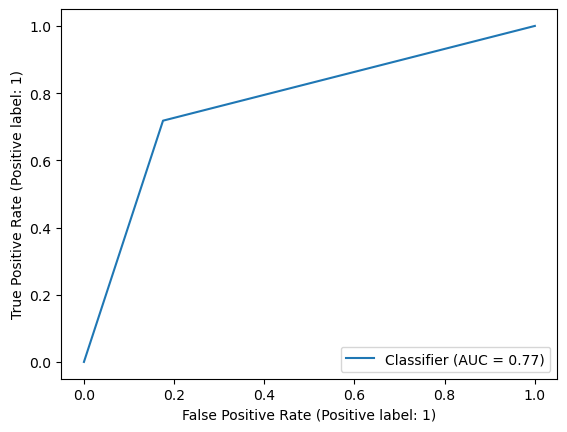

In [283]:
RocCurveDisplay.from_predictions(y_smote,knc_X_sm)

In [284]:
knc_predict_test_sm=knc_sm.predict(loan_tt)
kncpredict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', knc_predict_test_sm)

In [ ]:
pd.DataFrame(kncpredict_tt_sm).to_csv('knc_sm.csv')

# Naive bayes with smote

In [285]:
from sklearn.naive_bayes import GaussianNB

In [286]:
gb_sm=GaussianNB()

In [287]:
gbmodel_sm=gb_sm.fit(X_smote,y_smote)

In [288]:
gbmodel_sm.score(X_smote,y_smote)

0.7559241706161137

In [289]:
cross_val_score(gb_sm,X_smote,y_smote)

array([0.68047337, 0.71005917, 0.73964497, 0.75739645, 0.78571429])

In [290]:
np.mean([0.80487805, 0.75609756, 0.77235772, 0.82926829, 0.77868852])

0.7882580279999999

In [291]:
gb_X_sm=gb_sm.predict(X_smote)

In [292]:
pd.crosstab(y_smote,gb_X_sm)

col_0,0,1
Loan_Status,,
0,256,166
1,40,382


In [293]:
print(classification_report(y_smote,gb_X_sm))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71       422
           1       0.70      0.91      0.79       422

    accuracy                           0.76       844
   macro avg       0.78      0.76      0.75       844
weighted avg       0.78      0.76      0.75       844



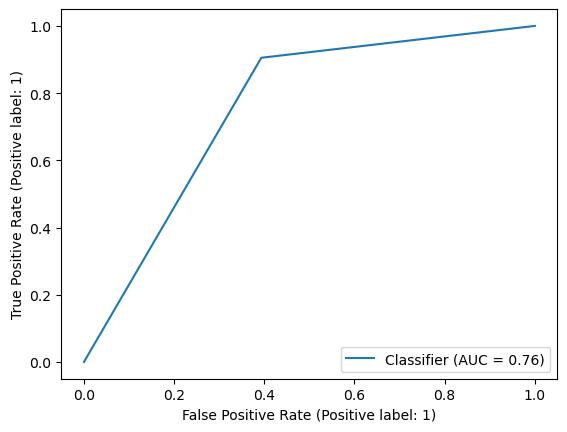

In [294]:
RocCurveDisplay.from_predictions(y_smote,gb_X_sm)

In [295]:
gb_predict_test_sm=gb_sm.predict(loan_tt)
gb_predict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', gb_predict_test_sm)

In [ ]:
pd.DataFrame(gb_predict_tt_sm).to_csv('gbnb_sm.csv')

# MultinomialNB with smote

In [296]:
from sklearn.naive_bayes import MultinomialNB

In [297]:
mb_sm=MultinomialNB()

In [298]:
mbmodel_sm=mb_sm.fit(X_smote,y_smote)

In [299]:
mbmodel_sm.score(X_smote,y_smote)

0.47985781990521326

In [300]:
cross_val_score(mb_sm,X_smote,y_smote)

array([0.43786982, 0.5147929 , 0.42011834, 0.50887574, 0.50595238])

In [301]:
np.mean([0.45528455, 0.5203252 , 0.44715447, 0.5203252 , 0.49180328])

0.48697854000000007

In [302]:
mb_X_sm=mb_sm.predict(X_smote)

In [303]:
pd.crosstab(y_smote,mb_X_sm)

col_0,0,1
Loan_Status,,
0,192,230
1,209,213


In [304]:
print(classification_report(y_smote,mb_X_sm))

              precision    recall  f1-score   support

           0       0.48      0.45      0.47       422
           1       0.48      0.50      0.49       422

    accuracy                           0.48       844
   macro avg       0.48      0.48      0.48       844
weighted avg       0.48      0.48      0.48       844



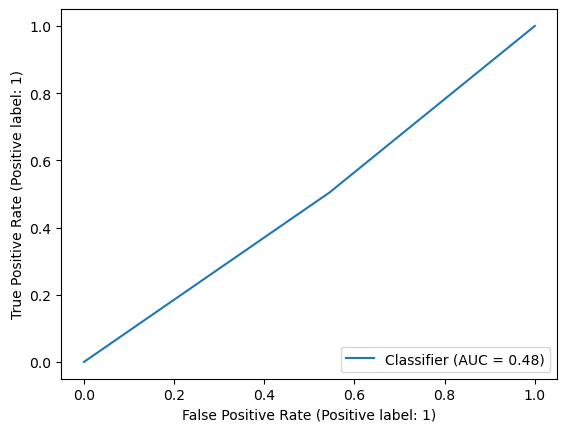

In [305]:
RocCurveDisplay.from_predictions(y_smote,mb_X_sm)

In [306]:
mb_predict_test_sm=mb_sm.predict(loan_tt)
mb_predict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', mb_predict_test_sm)

In [ ]:
pd.DataFrame(mb_predict_tt_sm).to_csv('mbnb_sm.csv')

# BernouliNB with smote

In [307]:
from sklearn.naive_bayes import BernoulliNB

In [308]:
bnb_sm=BernoulliNB()

In [309]:
bnbmodel_sm=bnb_sm.fit(X_smote,y_smote)

In [310]:
bnbmodel_sm.score(X_smote,y_smote)

0.7274881516587678

In [311]:
cross_val_score(bnb_sm,X_smote,y_smote)

array([0.68047337, 0.70414201, 0.70414201, 0.77514793, 0.72619048])

In [312]:
np.mean([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

0.8094628800000001

In [313]:
bnb_X_sm=bnb_sm.predict(X_smote)

In [314]:
pd.crosstab(y_smote,bnb_X_sm)

col_0,0,1
Loan_Status,,
0,294,128
1,102,320


In [315]:
print(classification_report(y_smote,bnb_X_sm))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       422
           1       0.71      0.76      0.74       422

    accuracy                           0.73       844
   macro avg       0.73      0.73      0.73       844
weighted avg       0.73      0.73      0.73       844



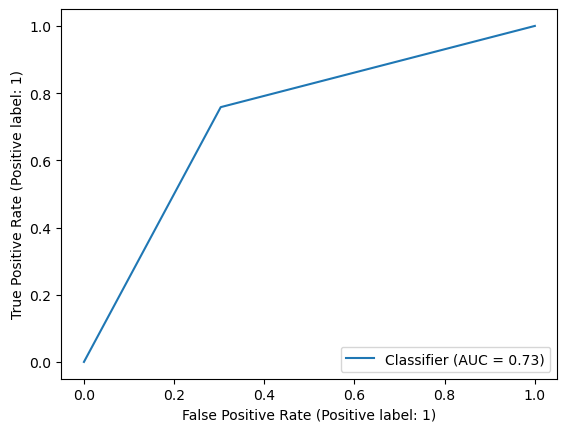

In [316]:
RocCurveDisplay.from_predictions(y_smote,bnb_X_sm)

In [317]:
bnb_predict_test_sm=bnb_sm.predict(loan_tt)
bnb_predict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', bnb_predict_test_sm)

In [ ]:
pd.DataFrame(bnb_predict_tt_sm).to_csv('bnb_sm.csv')

# LinearSVC with smote

In [318]:
from sklearn.svm import LinearSVC

In [319]:
ls_sm=LinearSVC(C=8)

In [320]:
lsmodel_sm=ls_sm.fit(X_smote,y_smote)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [321]:
lsmodel_sm.score(X_smote,y_smote)

0.49881516587677727

In [322]:
cross_val_score(ls_sm,X_smote,y_smote)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` i

array([0.49112426, 0.53846154, 0.49112426, 0.49704142, 0.51785714])

In [325]:
np.mean([0.49112426, 0.53846154, 0.49112426, 0.49704142, 0.51785714])

0.5071217239999999

In [328]:
lspredict_X=ls_sm.predict(X_smote)

In [329]:
pd.crosstab(y_smote,lspredict_X)

col_0,0,1
Loan_Status,,
0,420,2
1,421,1


In [330]:
print(classification_report(y_smote,lspredict_X))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       422
           1       0.33      0.00      0.00       422

    accuracy                           0.50       844
   macro avg       0.42      0.50      0.33       844
weighted avg       0.42      0.50      0.33       844



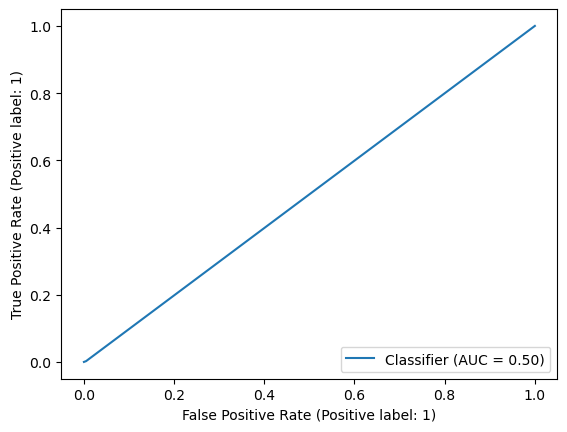

In [331]:
RocCurveDisplay.from_predictions(y_smote,lspredict_X)

In [332]:
lsvc_predict_test_sm=ls_sm.predict(loan_tt)
lsvcpredict_tt_sm = map(lambda x: 'Y' if x == 1 else 'N', lsvc_predict_test_sm)

In [333]:
pd.DataFrame(lsvcpredict_tt_sm).to_csv('lsvc_sm.csv')

# CategoricalNB with smote

In [334]:
from sklearn.naive_bayes import CategoricalNB

In [335]:
cat=CategoricalNB(alpha=10)

In [336]:
catmodel=cat.fit(X_smote,y_smote)

In [337]:
catmodel.score(X_smote,y_smote)

0.8459715639810427

In [338]:
cross_val_score(cat,X_smote,y_smote)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 102

array([0.69230769,        nan,        nan, 0.82840237, 0.83333333])

In [339]:
np.mean([0.69230769, 0.82840237, 0.83333333])

0.7846811300000001

In [340]:
catpredict=cat.predict(X_smote)

In [341]:
pd.crosstab(y_smote,catpredict)

col_0,0,1
Loan_Status,,
0,313,109
1,21,401


In [342]:
print(classification_report(y_smote,catpredict))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       422
           1       0.79      0.95      0.86       422

    accuracy                           0.85       844
   macro avg       0.86      0.85      0.84       844
weighted avg       0.86      0.85      0.84       844



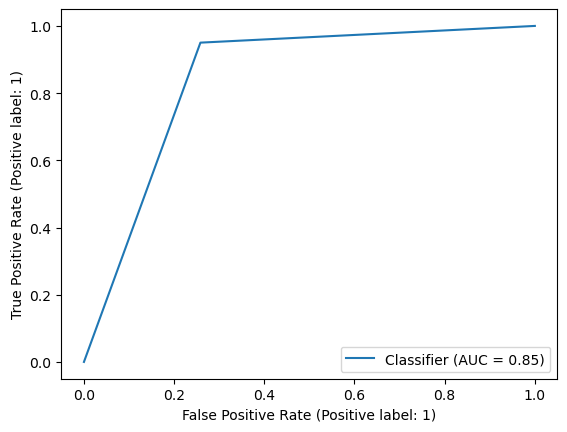

In [343]:
RocCurveDisplay.from_predictions(y_smote,catpredict)

In [347]:
cat_predict_test=cat.predict(loan_tt)
cat_predict_tt = map(lambda x: 'Y' if x == 1 else 'N', cat_predict_test)
cat_predict_tt=pd.DataFrame(cat_predict_tt)

In [348]:
cat_predict_tt.value_counts()

Y    271
N     96
dtype: int64

# Summary

|Model Name|Accuracy_Score|Accuracy_Score with smote|ROC/AUC value|ROC/AUC with smote|F1_score in Analytics Vidya|F1_score in Analytics Vidya with smote|
|:--:|:---:|:---:|:---:|:--:|:-:|:--:|
|Binary Logistic Regression|0.6872964169381107|0.7796208530805687|0.50|0.50|0.715277777777778|
|Decission Tree|0.8745928338762216|0.9087677725118484|0.81|0.91|0.777777777777778|
|Random Forest|0.8778501628664495|0.8720379146919431|0.80|0.87|0.777777777777778|
|Gradient Boosting Machine|0.8599348534201955|0.8530805687203792|0.78|0.85|
|Support Vector Machine|0.6954397394136808|0.8495260663507109|0.51|0.85|
|linearsvc|0.6970684039087948|0.5|0.52|0.50|
|K-Nearest Neighbor|0.7361563517915309|0.7713270142180095|0.63|0.77|
|GaussianNB(Naive Bayes)|0.7980456026058632|0.7559241706161137|0.71|0.76|
|BernouliNB|0.8094462540716613|0.7274881516587678|0.71|0.73|
|MultinomialNB|0.49022801302931596|0.47985781990521326|0.48|0.48|
|CategoricalNB|0.8973941368078175|0.8459715639810427|0.84|0.85||